In [ ]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
df=pd.read_csv("/content/air quality dataset.csv")

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.shape

(29531, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [ ]:
df[df.duplicated()]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket


#  DATA CLEANING AND PREPROCESSING**

Drop rows where the target variable (AQI) is missing

In [ ]:
df=df.dropna(subset=["AQI"],ignore_index=True)
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
1,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
2,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
3,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
4,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
24846,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
24847,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
24848,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df[df["AQI"].isnull()]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


Convert date column to datetime format


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

 categorize the AQI_Bucket column

In [ ]:
df['AQI_Bucket'] = df['AQI_Bucket'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24850 entries, 0 to 24849
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        24850 non-null  object        
 1   Date        24850 non-null  datetime64[ns]
 2   PM2.5       24172 non-null  float64       
 3   PM10        17764 non-null  float64       
 4   NO          24463 non-null  float64       
 5   NO2         24459 non-null  float64       
 6   NOx         22993 non-null  float64       
 7   NH3         18314 non-null  float64       
 8   CO          24405 non-null  float64       
 9   SO2         24245 non-null  float64       
 10  O3          24043 non-null  float64       
 11  Benzene     21315 non-null  float64       
 12  Toluene     19024 non-null  float64       
 13  Xylene      9478 non-null   float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  category      
dtypes: category(1), dateti

# Data visualization

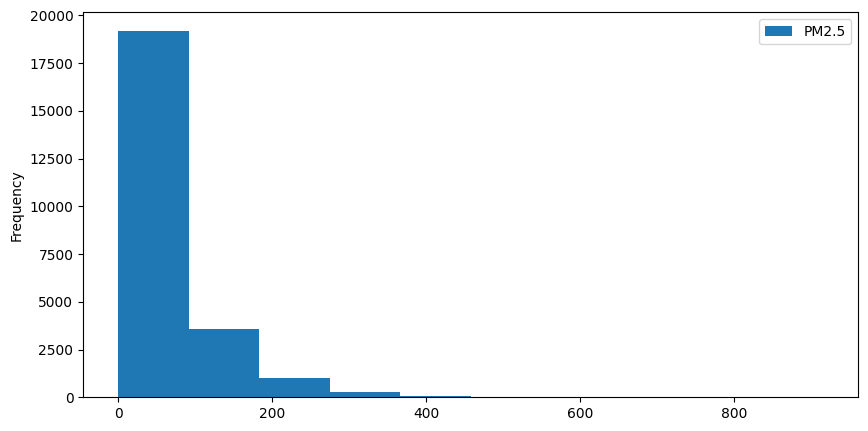

In [ ]:
df["PM2.5"].plot(kind="hist",figsize=(10,5))
plt.legend()
plt.show()

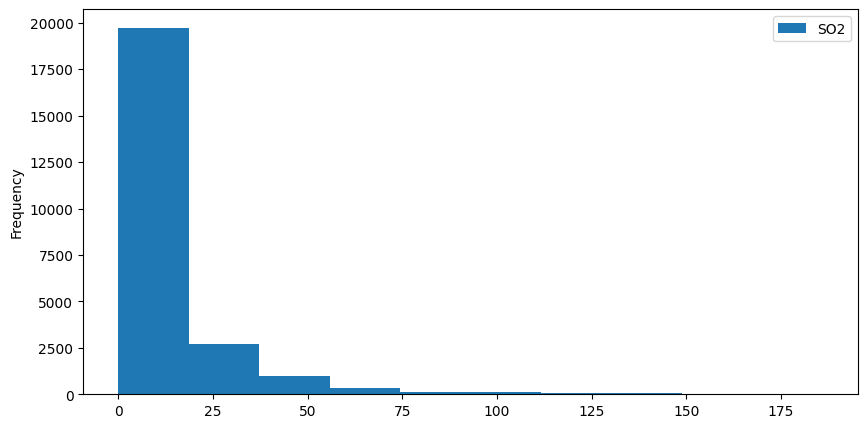

In [ ]:
df["SO2"].plot(kind="hist",figsize=(10,5))
plt.legend()
plt.show()

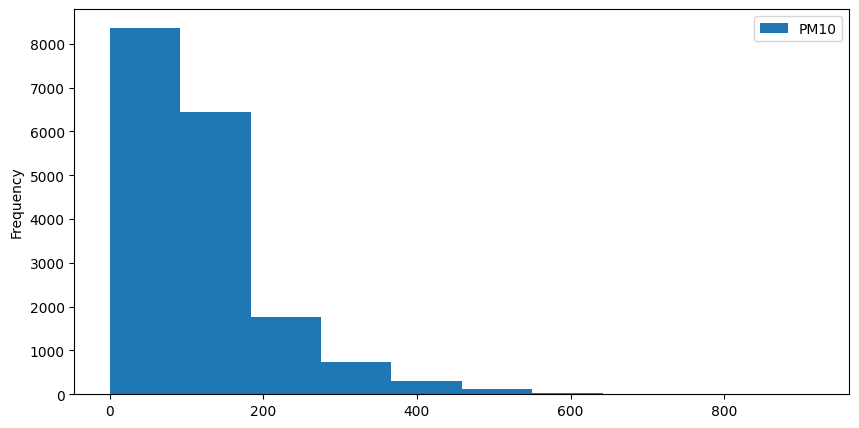

In [ ]:
df["PM10"].plot(kind="hist",figsize=(10,5))
plt.legend()
plt.show()

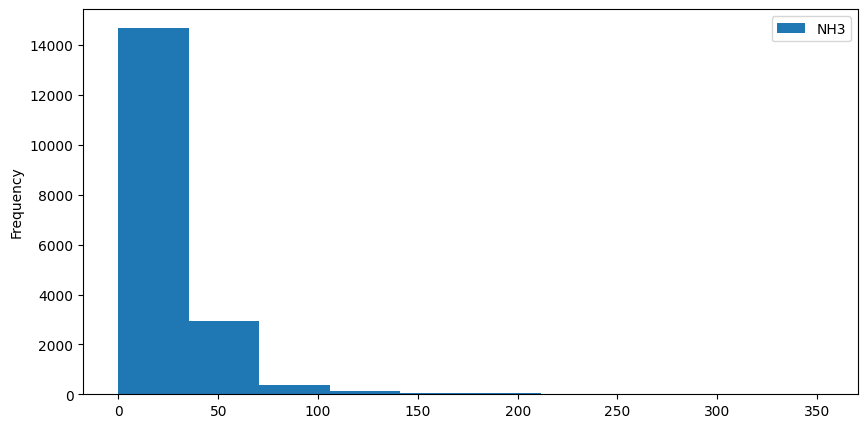

In [ ]:
df["NH3"].plot(kind="hist",figsize=(10,5))
plt.legend()
plt.show()

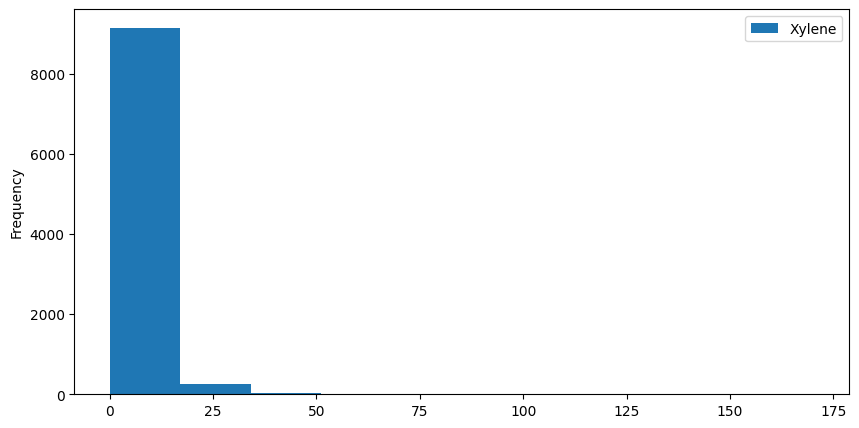

In [ ]:
df["Xylene"].plot(kind="hist",figsize=(10,5))
plt.legend()
plt.show()

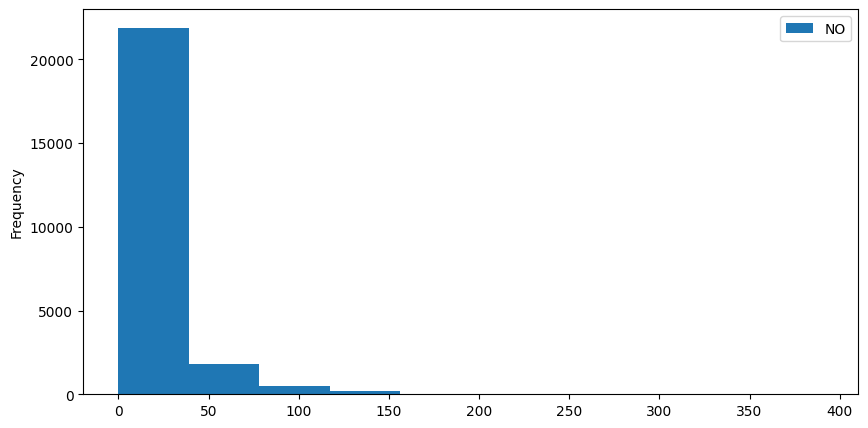

In [ ]:
df["NO"].plot(kind="hist",figsize=(10,5))
plt.legend()
plt.show()

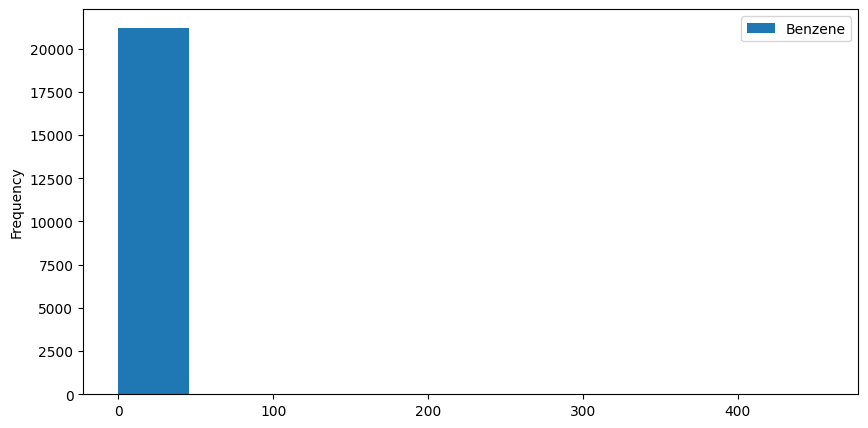

In [ ]:
df["Benzene"].plot(kind="hist",figsize=(10,5))
plt.legend()
plt.show()

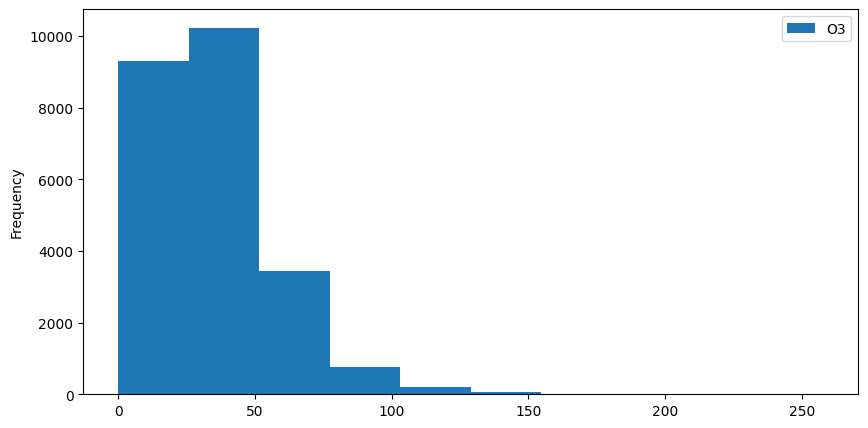

In [ ]:
df["O3"].plot(kind="hist",figsize=(10,5))
plt.legend()
plt.show()

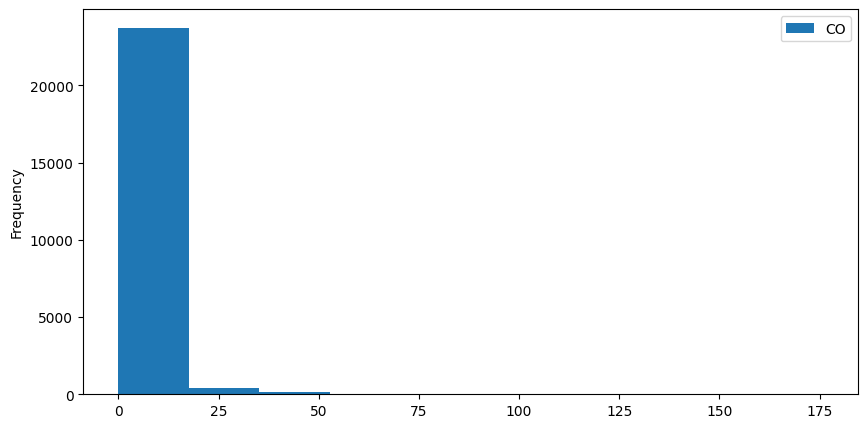

In [ ]:
df["CO"].plot(kind="hist",figsize=(10,5))
plt.legend()
plt.show()

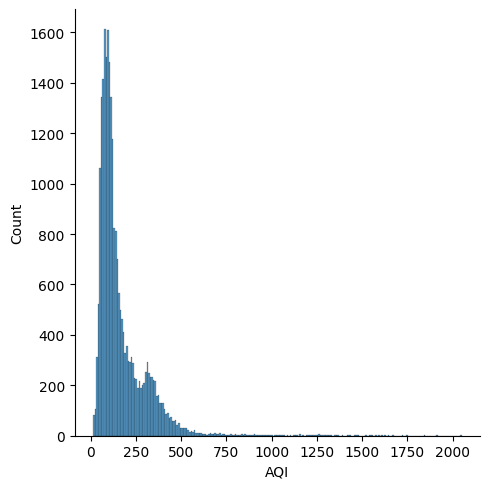

In [ ]:
sn.displot(df,x="AQI")
plt.show()

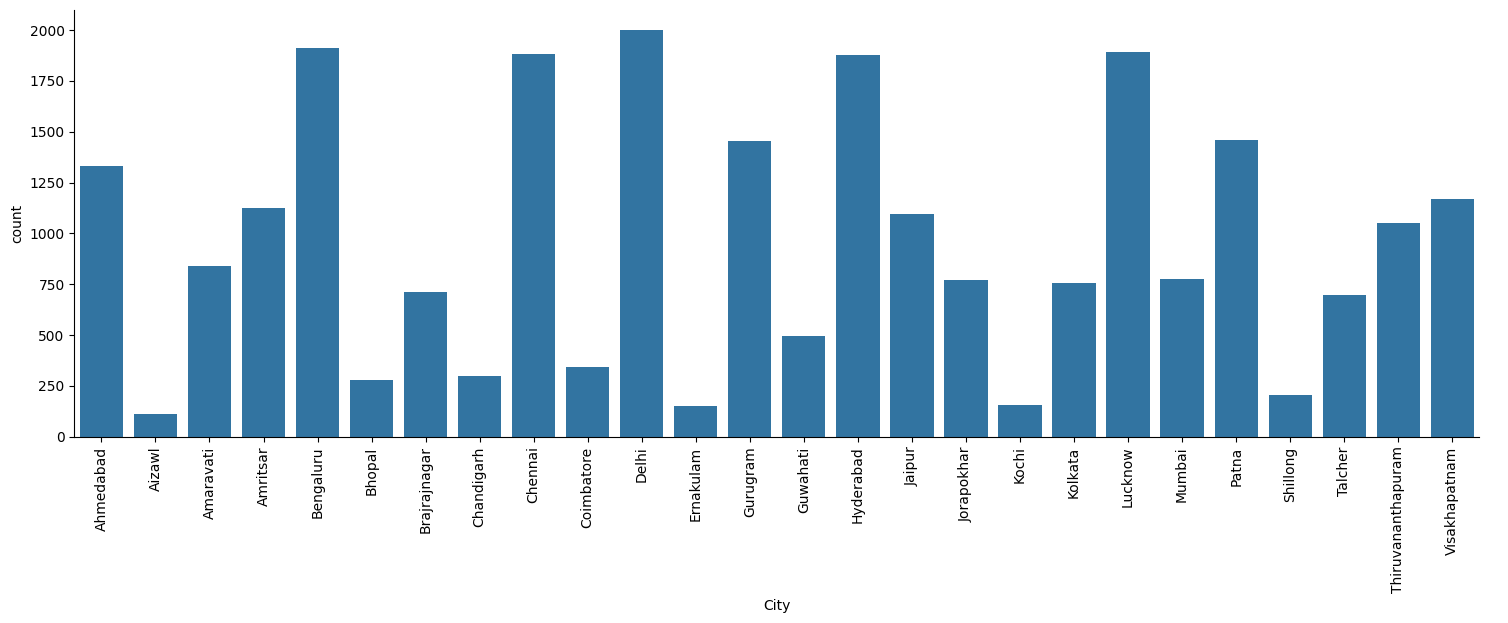

In [ ]:
# bivariate analysis

graph1=sn.catplot(x="City",kind="count",data=df,height=5 , aspect=3)
graph1.set_xticklabels(rotation=90)
plt.show()

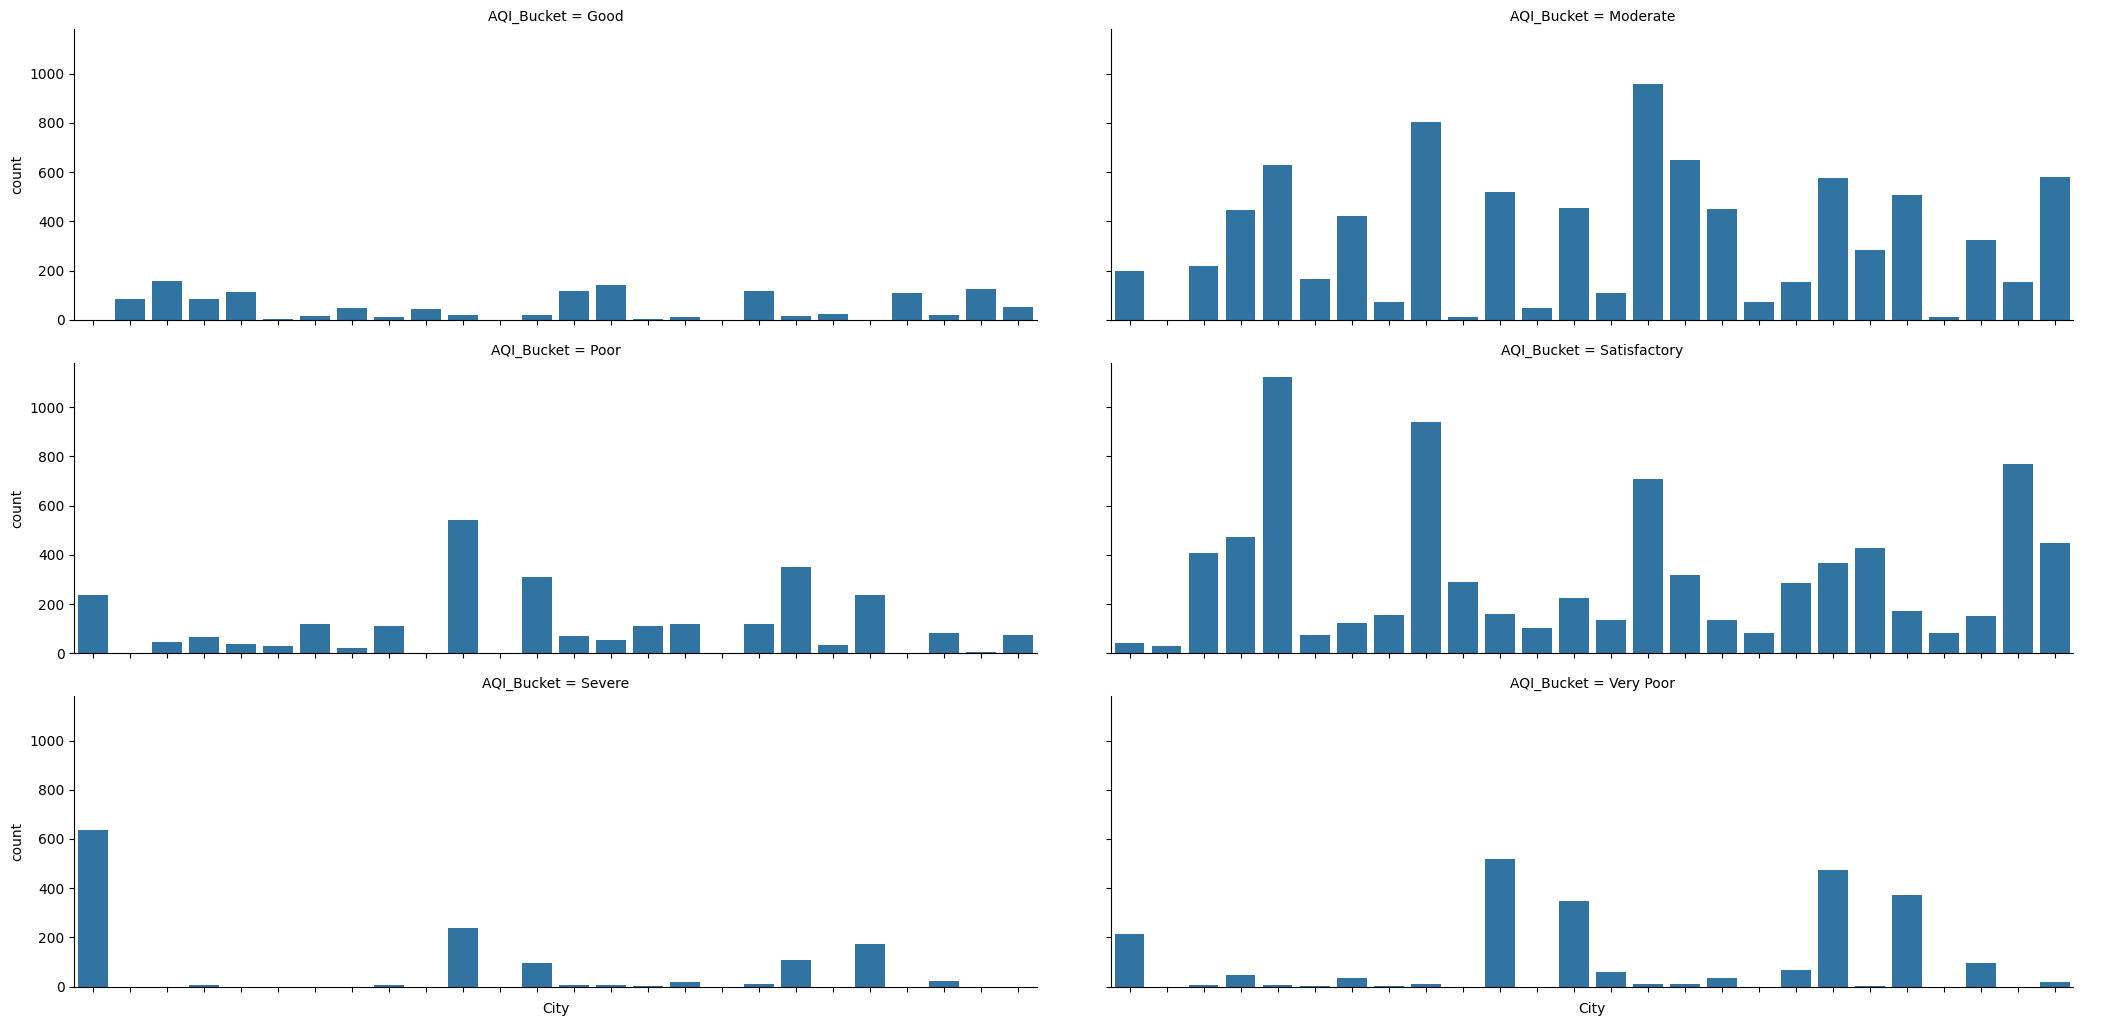

In [ ]:
graph2=sn.catplot(x="City",kind="count",col="AQI_Bucket",col_wrap=2,data=df,height=3.5 , aspect=3)
graph2.set_xticklabels(rotation=90)
plt.show()

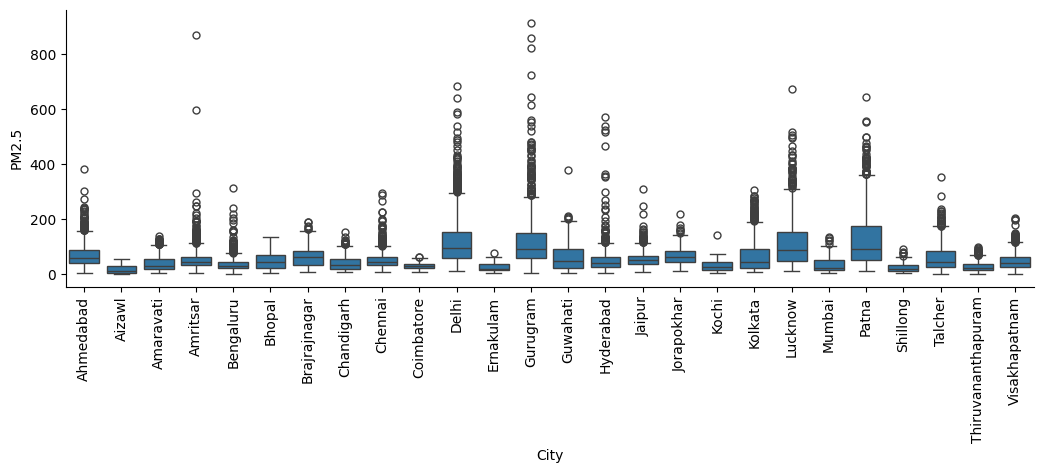

In [ ]:
graph3=sn.catplot(x="City",y="PM2.5",kind="box",data=df,height=3.5 , aspect=3)
graph3.set_xticklabels(rotation=90)
plt.show()

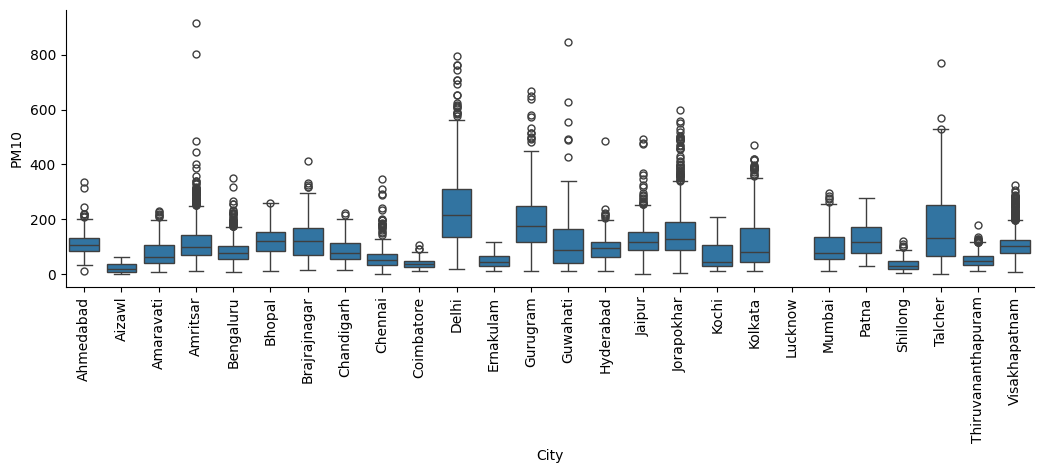

In [ ]:
graph4=sn.catplot(x="City",y="PM10",kind="box",data=df,height=3.5 , aspect=3)
graph4.set_xticklabels(rotation=90)
plt.show()

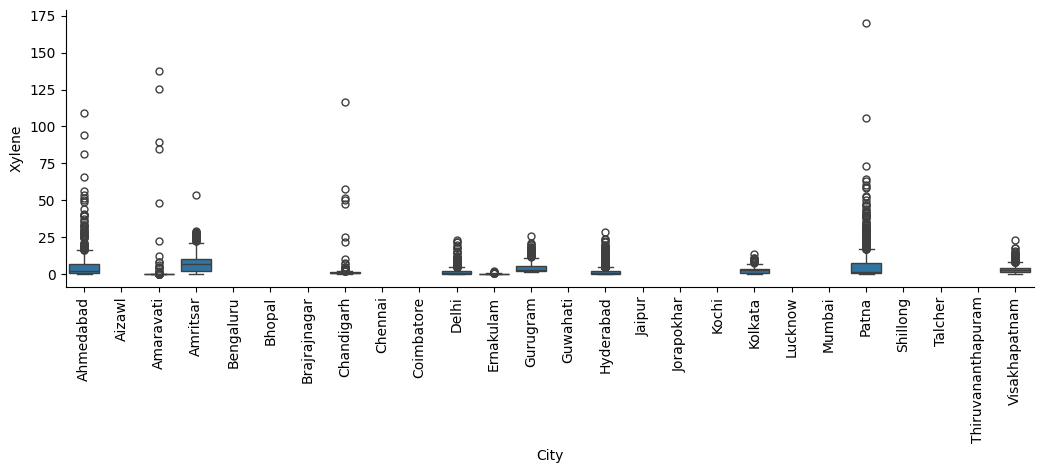

In [ ]:
graph5=sn.catplot(x="City",y="Xylene",kind="box",data=df,height=3.5 , aspect=3)
graph5.set_xticklabels(rotation=90)
plt.show()

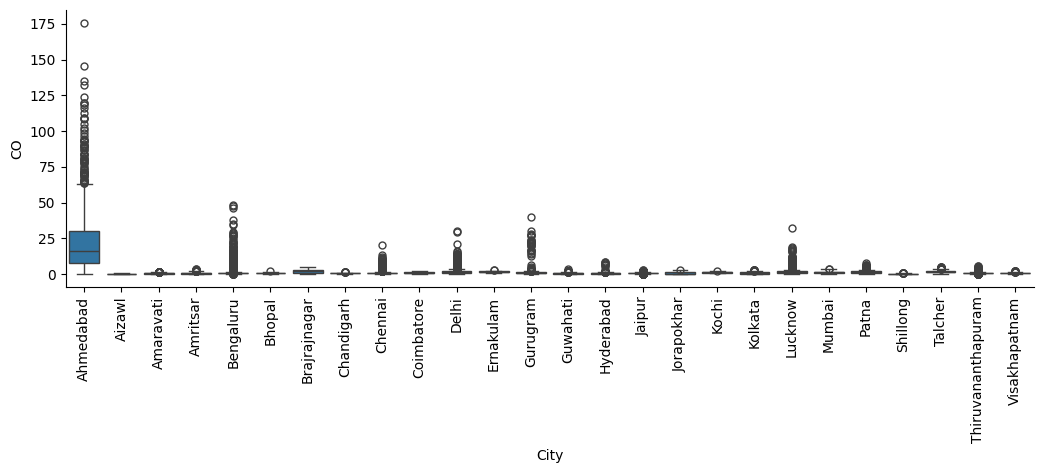

In [ ]:
graph6=sn.catplot(x="City",y="CO",kind="box",data=df,height=3.5 , aspect=3)
graph6.set_xticklabels(rotation=90)
plt.show()

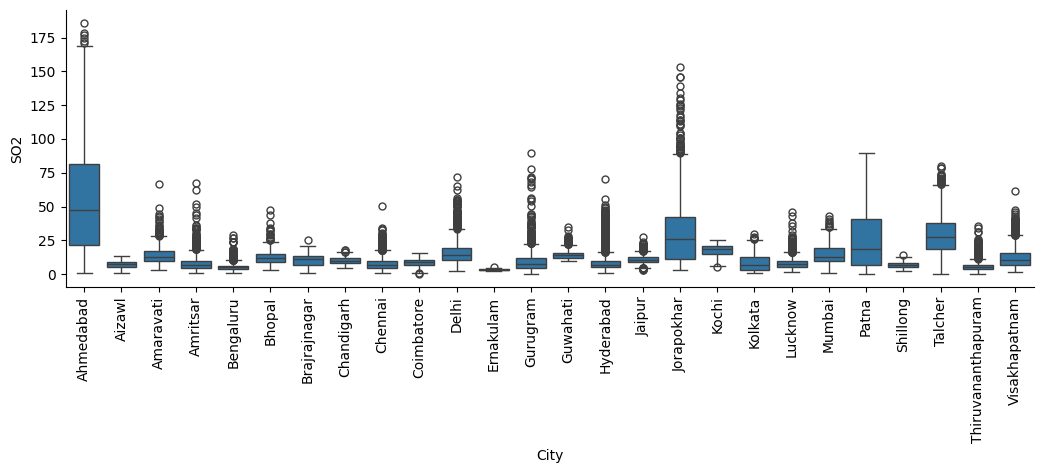

In [ ]:
graph7=sn.catplot(x="City",y="SO2",kind="box",data=df,height=3.5 , aspect=3)
graph7.set_xticklabels(rotation=90)
plt.show()

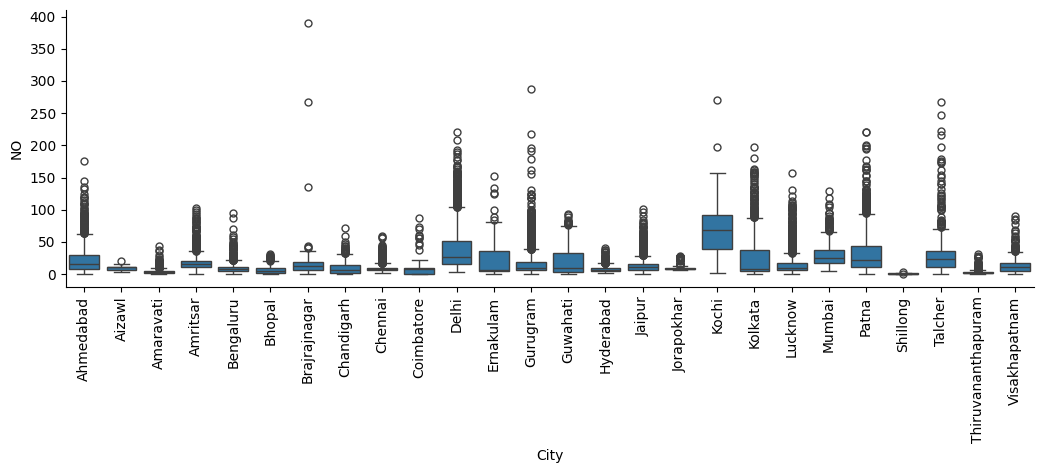

In [ ]:
graph8=sn.catplot(x="City",y="NO",kind="box",data=df,height=3.5 , aspect=3)
graph8.set_xticklabels(rotation=90)
plt.show()

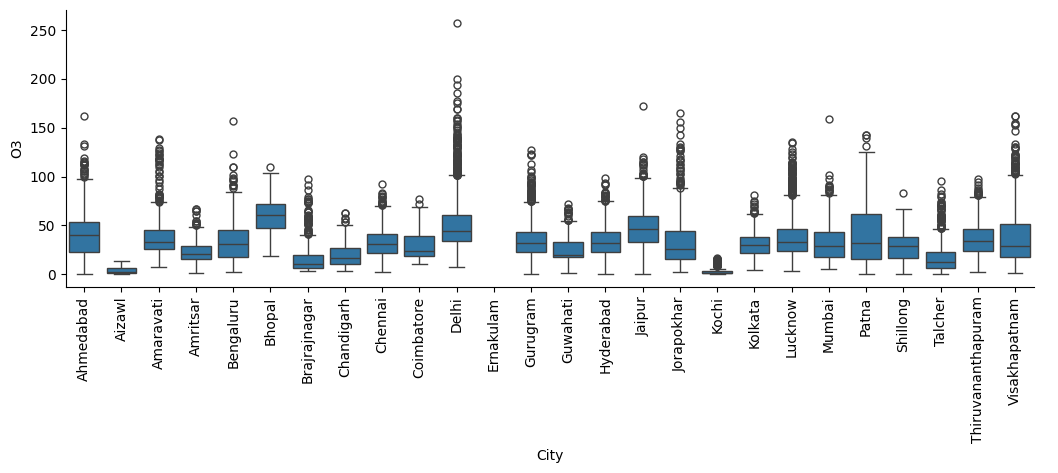

In [ ]:
graph=sn.catplot(x="City",y="O3",kind="box",data=df,height=3.5 , aspect=3)
graph.set_xticklabels(rotation=90)
plt.show()

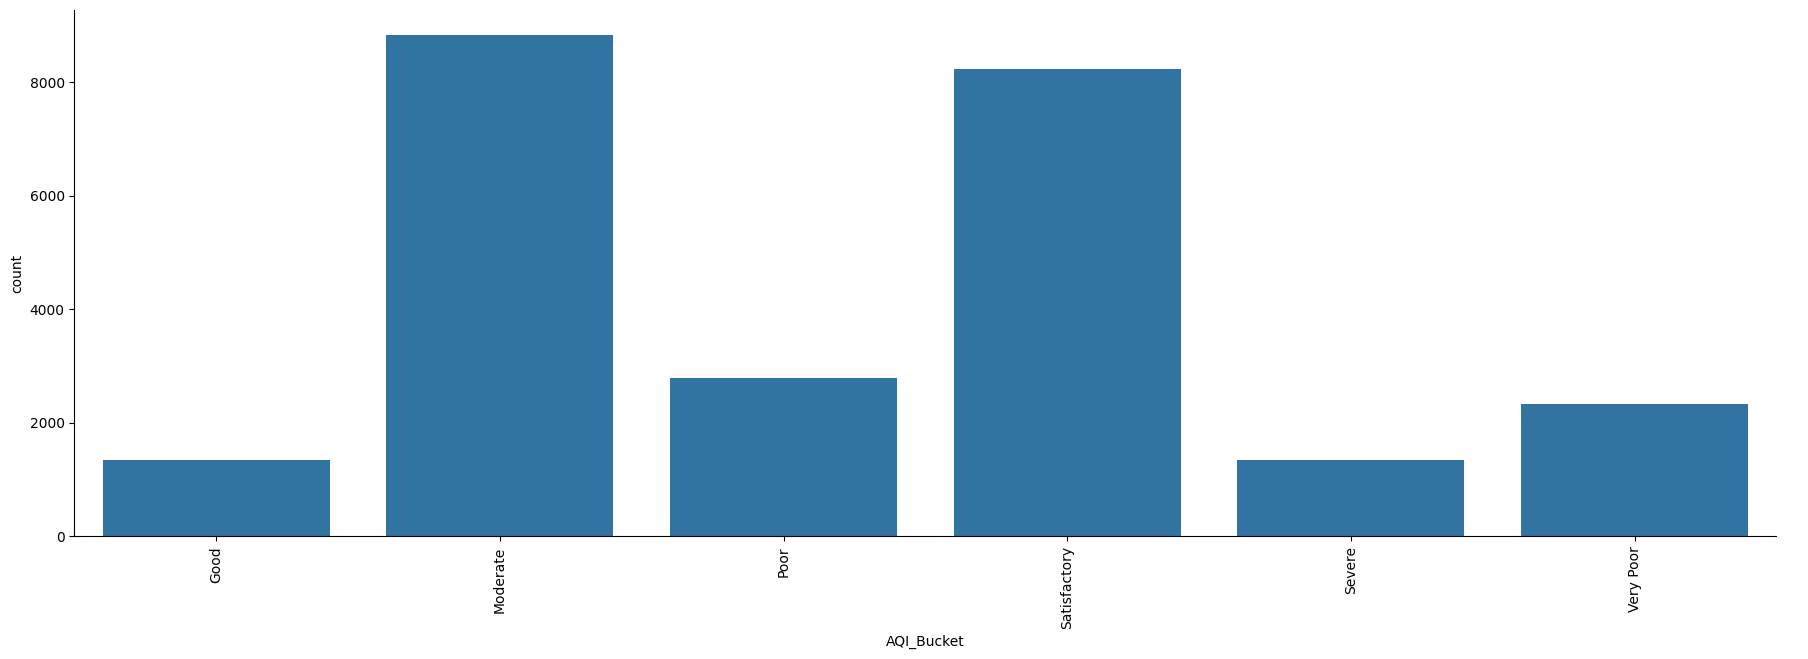

In [ ]:
graph6=sn.catplot(x="AQI_Bucket",kind="count",data=df,height=6 , aspect=3)
graph6.set_xticklabels(rotation=90)
plt.show()

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


In [ ]:
df.describe().loc["mean"]

,mean
Date,2018-07-24 18:51:25.714285568
PM2.5,67.476613
PM10,118.454435
NO,17.622421
NO2,28.978391
NOx,32.289012
NH3,23.848366
CO,2.345267
SO2,14.362933
O3,34.912885


In [ ]:
df=df.replace({
    "PM2.5":{np.nan:df["PM2.5"].mean()},
    "PM10":{np.nan:df["PM10"].mean()},
    "SO2":{np.nan:df["SO2"].mean()},
    "NO":{np.nan:df["NO"].mean()},
    "NO2":{np.nan:df["NO2"].mean()},
    "NH3":{np.nan:df["NH3"].mean()},
    "CO":{np.nan:df["CO"].mean()},
    "O3":{np.nan:df["O3"].mean()},
    "Benzene":{np.nan:df["Benzene"].mean()},
    "Toluene":{np.nan:df["Toluene"].mean()},
    "Xylene":{np.nan:df["Xylene"].mean()},
    "NOx":{np.nan:df["NOx"].mean()}

})

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
df=df.drop(["AQI_Bucket"],axis=1)

<Axes: >

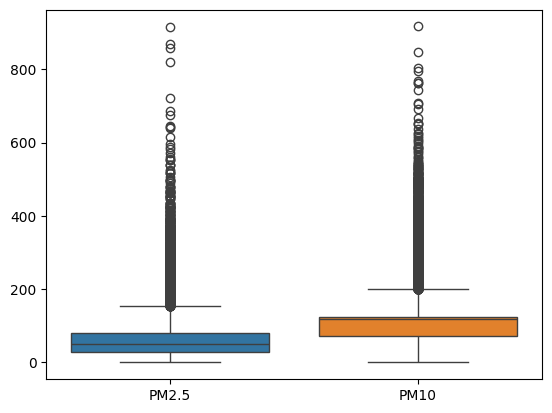

In [ ]:
sn.boxplot(df[["PM2.5","PM10"]])

<Axes: >

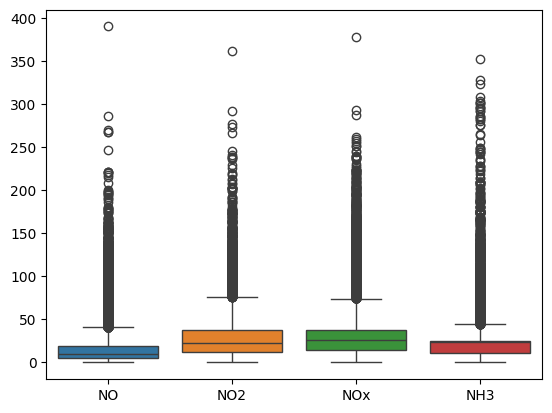

In [ ]:
sn.boxplot(df[["NO","NO2","NOx","NH3"]])

<Axes: >

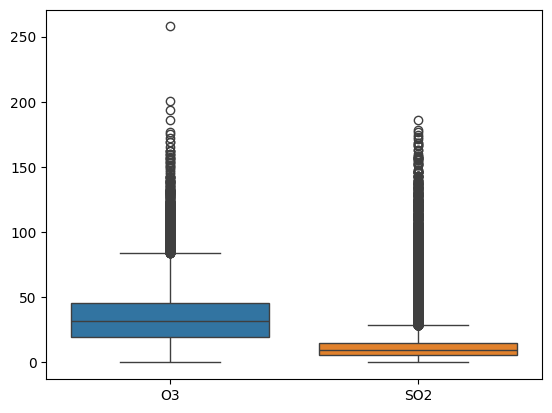

In [ ]:
sn.boxplot(df[["O3","SO2"]])

In [ ]:
def replace_outliers(df):
    for column in df.select_dtypes(include=["number"]).columns:
        Q1=df[column].quantile(0.25)
        Q3=df[column].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        df[column]=df[column].apply(lambda x:Q1 if x<lower_bound else (Q3 if x>upper_bound else x))


    return df



In [ ]:
df=replace_outliers(df)

In [ ]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24850,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000
mean,2018-07-24 18:51:25.714285568,55.174281,101.351323,12.507694,25.901114,26.574513,19.486584,1.040507,10.334743,33.177781,2.098520,6.222709,3.304507,146.932032
min,2015-01-01 00:00:00,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,1.250000,13.000000
25%,2017-08-16 00:00:00,29.560000,71.780000,5.720000,12.090000,14.030000,11.280000,0.590000,5.790000,19.640000,0.340000,1.580000,2.650000,81.000000
50%,2018-11-05 00:00:00,50.165000,118.454435,10.075000,22.535000,25.720000,23.848366,0.950000,9.430000,32.060000,1.810000,6.790000,3.588683,118.000000
75%,2019-10-11 00:00:00,79.505625,122.955625,19.710000,37.910000,38.170000,24.710000,1.530000,14.890000,45.395625,3.458668,9.525714,3.588683,208.000000
max,2020-07-01 00:00:00,154.300000,199.700000,40.680000,76.620000,74.380000,44.850000,2.940000,28.520000,83.990000,8.130000,21.440000,4.990000,398.000000
std,NaN,31.829575,39.079916,8.762015,16.669494,16.138682,9.630370,0.615436,5.680901,17.487724,1.828135,4.696068,0.558608,87.421731


<Axes: >

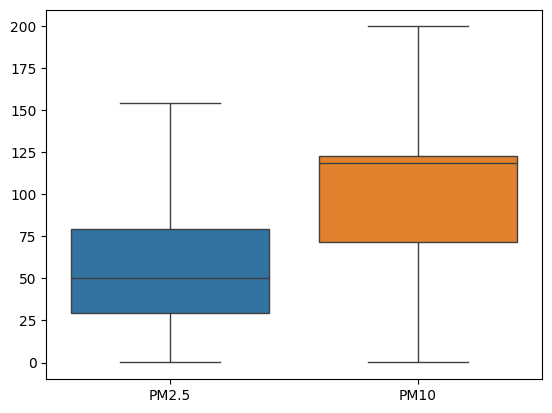

In [ ]:
sn.boxplot(df[["PM2.5","PM10"]])

<Axes: >

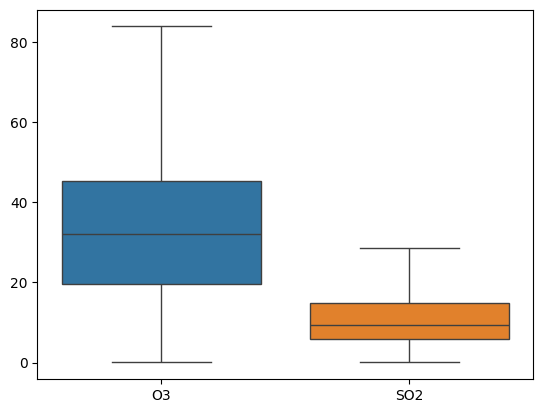

In [ ]:
sn.boxplot(df[["O3","SO2"]])

<Axes: >

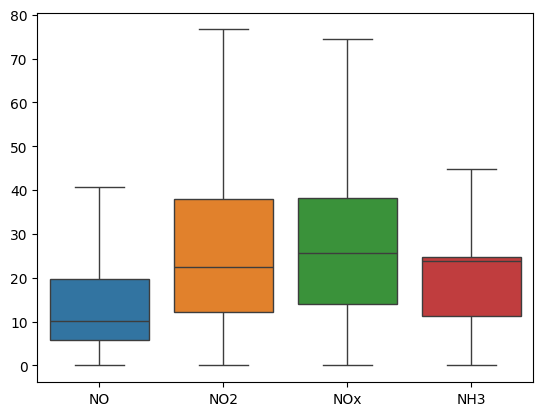

In [ ]:
sn.boxplot(df[["NO","NO2","NOx","NH3"]])

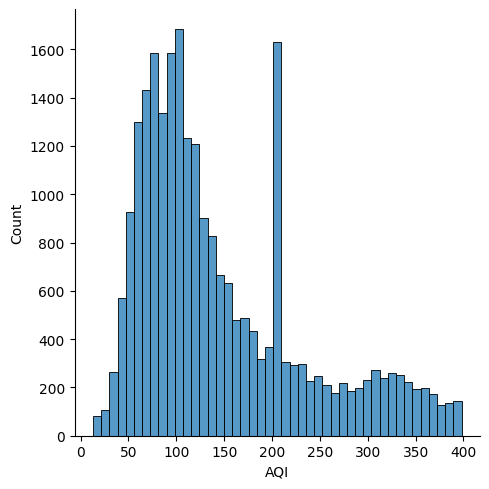

In [ ]:
sn.displot(df,x="AQI")

In [ ]:
# multivariant analysis
df1=df.drop(["City"],axis=1)

<Axes: >

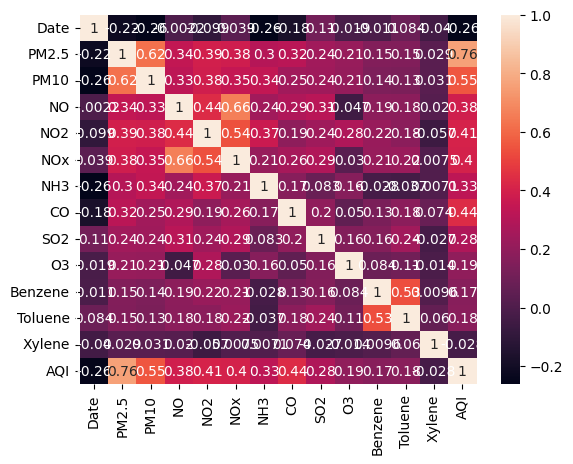

In [ ]:
sn.heatmap(df1.corr(),annot=True)

## DATA MODELLING

In [ ]:
df.drop(["Date","City"],axis=1,inplace=True)

In [ ]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.020000,0.000000,3.140000,209.0
1,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.040000,0.000000,4.810000,328.0
2,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.240000,0.010000,3.588683,208.0
3,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.400000,0.040000,3.588683,208.0
4,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.460000,0.060000,3.588683,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,15.0200,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.3000,2.240000,12.070000,2.650000,41.0
24846,24.3800,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.1400,0.740000,2.210000,2.650000,70.0
24847,22.9100,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.9600,0.010000,0.010000,2.650000,68.0
24848,16.6400,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.3000,0.000000,0.000000,2.650000,54.0


In [ ]:
# scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df1=StandardScaler().fit_transform(df)
df1

array([[ 0.87831149,  0.43765335, -0.63658947, ..., -1.325116  ,
        -0.29450055,  0.70999757],
       [ 0.77494642,  0.43765335,  0.15319907, ..., -1.325116  ,
         2.69513628,  2.07124258],
       [ 1.23616198,  0.43765335,  1.35614288, ..., -1.32298652,
         0.50873299,  0.69855854],
       ...,
       [-1.01367767, -0.91151783, -1.03376636, ..., -1.32298652,
        -1.17169938, -0.90290618],
       [-1.21066824, -1.31480214, -0.96528759, ..., -1.325116  ,
        -1.17169938, -1.06305265],
       [-1.26219369, -0.90460877, -1.3818668 , ...,  0.70336954,
         0.50873299, -1.10880878]])

In [ ]:
df=pd.DataFrame(df1,columns=df.columns)
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.878311,0.437653,-0.636589,0.168508,0.442764,0.452929,0.795376,0.801871,1.520081,-1.136985,-1.325116,-0.294501,0.709998
1,0.774946,0.437653,0.153199,0.166708,0.898821,0.452929,0.795376,0.801871,0.698774,-1.126045,-1.325116,2.695136,2.071243
2,1.236162,0.437653,1.356143,0.405473,1.613267,0.452929,0.795376,0.801871,0.698774,-1.016642,-1.322987,0.508733,0.698559
3,2.539065,0.437653,0.822008,0.970588,0.718505,0.452929,0.795376,0.801871,0.698774,-0.929119,-1.316598,0.508733,0.698559
4,0.764500,0.437653,0.822008,0.564449,2.864324,0.452929,0.795376,0.801871,0.698774,-0.896298,-1.312339,0.508733,0.698559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,-1.261565,-1.289981,-0.550991,-0.050459,-0.435888,-0.728604,-0.927014,-0.314172,-0.564852,0.077392,1.245171,-1.171699,-1.211760
24846,-0.967493,-0.697593,-1.037190,0.009532,-0.622400,-0.778447,-0.845770,0.419882,-0.173713,-0.743133,-0.854500,-1.171699,-0.880028
24847,-1.013678,-0.911518,-1.033766,0.217701,-0.510864,-0.911363,-0.910766,-0.337056,-0.126822,-1.142455,-1.322987,-1.171699,-0.902906
24848,-1.210668,-1.314802,-0.965288,0.201503,-0.481741,-0.981974,-0.845770,-0.087091,-0.278932,-1.147926,-1.325116,-1.171699,-1.063053


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split



In [ ]:
# feature selection

In [ ]:
df.columns


Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [ ]:
X=df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', "Xylene"]]
y=df['AQI']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(19880, 12)
(4970, 12)
(19880,)
(4970,)


In [ ]:
# linear regression

LR=LinearRegression()
LR.fit(x_train,y_train)
train_pred=LR.predict(x_train)
test_pred=LR.predict(x_test)

In [ ]:
# evaluation for linear regresion

RMSE_train=(np.sqrt(mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(mean_squared_error(y_test,test_pred)))
print("RMSE_train",str(RMSE_train))
print("RMSE_test",str(RMSE_test))
print("-"*60)
print("R squared value for Train =", LR.score(x_train,y_train))
print("R squared value for Test =", LR.score(x_test,y_test))

RMSE_train 0.5917597960114884
RMSE_test 0.5820293940146389
------------------------------------------------------------
R squared value for Train = 0.651077421117453
R squared value for Test = 0.6562598895825258


In [ ]:
# KNN
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
train_pred=knn.predict(x_train)
test_pred=knn.predict(x_test)


In [ ]:
# evaluation for KNN

RMSE_train=(np.sqrt(mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(mean_squared_error(y_test,test_pred)))
print("RMSE_train",str(RMSE_train))
print("RMSE_test",str(RMSE_test))
print("-"*60)
print("R squared value for Train =", knn.score(x_train,y_train))
print("R squared value for Test =", knn.score(x_test,y_test))

RMSE_train 0.3898064116973791
RMSE_test 0.4802534245936315
------------------------------------------------------------
R squared value for Train = 0.8485964290838459
R squared value for Test = 0.7659647276447062


In [ ]:
# Decion Tree
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
train_pred=dtr.predict(x_train)
test_pred=dtr.predict(x_test)

In [ ]:
# evaluation for Decion tree

RMSE_train=(np.sqrt(mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(mean_squared_error(y_test,test_pred)))
print("RMSE_train",str(RMSE_train))
print("RMSE_test",str(RMSE_test))
print("-"*60)
print("R squared value for Train =", dtr.score(x_train,y_train))
print("R squared value for Test =", dtr.score(x_test,y_test))

RMSE_train 0.02594854601836432
RMSE_test 0.5475337585553517
------------------------------------------------------------
R squared value for Train = 0.9993290900734868
R squared value for Test = 0.6957979210053523


In [ ]:
# Random Forest
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
train_pred=rfr.predict(x_train)
test_pred=rfr.predict(x_test)

In [ ]:
# evaluation for random forest

RMSE_train=(np.sqrt(mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(mean_squared_error(y_test,test_pred)))
print("RMSE_train",str(RMSE_train))
print("RMSE_test",str(RMSE_test))
print("-"*60)
print("R squared value for Train =", rfr.score(x_train,y_train))
print("R squared value for Test =", rfr.score(x_test,y_test))

RMSE_train 0.14876104299900056
RMSE_test 0.3917869015297957
------------------------------------------------------------
R squared value for Train = 0.9779495939632403
R squared value for Test = 0.8442456444226284
